In [27]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv(r'C:\Users\Khaled\.spyder-py3\Multivariable Regression.txt', names=['Size', 'BedRooms','Price'])

In [3]:
data.head()

,Size,BedRooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.tail()

,Size,BedRooms,Price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
BedRooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
Price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


In [6]:
# rescaling data
data= (data - data.mean()) / data.std()

In [7]:
data.insert(0, 'Ones', 1)

In [8]:
data.head()

,Ones,Size,BedRooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [9]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [10]:
X= np.matrix(X.values)
y= np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [11]:
alpha = 0.1
iters = 100

In [12]:
def compute_cost(X,y,theta):
    z=np.power(((X*theta.T)-y),2)
    return np.sum(z)/(2*len(X))

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            theta = temp
            cost[i] = compute_cost(X, y, theta)
    return theta, cost  

In [14]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [17]:
thiscost = compute_cost(X, y, g)

In [18]:
g

matrix([[-1.12557717e-16,  8.79020847e-01, -4.74337322e-02]])

In [19]:
cost

array([0.40693147, 0.34617152, 0.30110291, 0.26742183, 0.24202804,
       0.22268634, 0.20778332, 0.19615275, 0.18695011, 0.17956245,
       0.17354364, 0.16856787, 0.1643961 , 0.16085209, 0.15780504,
       0.15515715, 0.15283462, 0.1507812 , 0.14895353, 0.14731772,
       0.14584693, 0.14451959, 0.14331811, 0.14222795, 0.14123687,
       0.14033451, 0.13951191, 0.13876131, 0.13807589, 0.13744961,
       0.13687711, 0.13635356, 0.13587464, 0.13543646, 0.13503547,
       0.13466846, 0.13433251, 0.13402498, 0.13374344, 0.13348567,
       0.13324967, 0.13303358, 0.13283572, 0.13265455, 0.13248866,
       0.13233675, 0.13219766, 0.13207029, 0.13195365, 0.13184685,
       0.13174905, 0.1316595 , 0.13157749, 0.1315024 , 0.13143363,
       0.13137066, 0.131313  , 0.1312602 , 0.13121184, 0.13116757,
       0.13112702, 0.13108989, 0.13105589, 0.13102476, 0.13099625,
       0.13097014, 0.13094623, 0.13092434, 0.1309043 , 0.13088594,
       0.13086913, 0.13085373, 0.13083964, 0.13082673, 0.13081

In [20]:
thiscost

0.1307006953901485

In [21]:
x = np.linspace(data.Size.min(), data.Size.max(), 100)

In [22]:
f = g[0, 0] + (g[0, 1] * x)

In [23]:
f

array([-1.27055672, -1.23004438, -1.18953205, -1.14901971, -1.10850738,
       -1.06799504, -1.02748271, -0.98697037, -0.94645803, -0.9059457 ,
       -0.86543336, -0.82492103, -0.78440869, -0.74389636, -0.70338402,
       -0.66287169, -0.62235935, -0.58184701, -0.54133468, -0.50082234,
       -0.46031001, -0.41979767, -0.37928534, -0.338773  , -0.29826067,
       -0.25774833, -0.21723599, -0.17672366, -0.13621132, -0.09569899,
       -0.05518665, -0.01467432,  0.02583802,  0.06635035,  0.10686269,
        0.14737503,  0.18788736,  0.2283997 ,  0.26891203,  0.30942437,
        0.3499367 ,  0.39044904,  0.43096137,  0.47147371,  0.51198605,
        0.55249838,  0.59301072,  0.63352305,  0.67403539,  0.71454772,
        0.75506006,  0.79557239,  0.83608473,  0.87659706,  0.9171094 ,
        0.95762174,  0.99813407,  1.03864641,  1.07915874,  1.11967108,
        1.16018341,  1.20069575,  1.24120808,  1.28172042,  1.32223276,
        1.36274509,  1.40325743,  1.44376976,  1.4842821 ,  1.52

Text(0.5, 1.0, 'Size vs. Price')

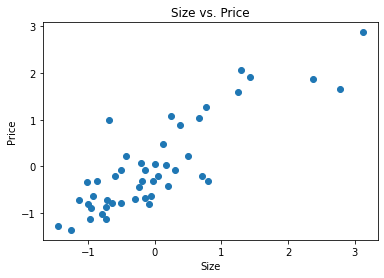

In [26]:
plt.scatter(data.Size,data.Price,label='Training Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs. Price')

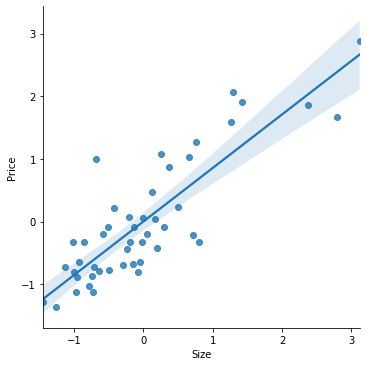

In [29]:
sns.lmplot(x="Size",y="Price",data=data)

In [32]:
# get best fit line for Bedrooms vs. Price

x = np.linspace(data.BedRooms.min(), data.BedRooms.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

Text(0.5, 1.0, 'Size vs. Price')

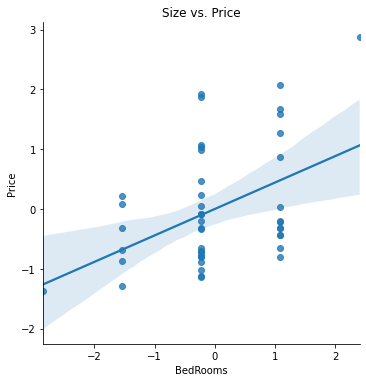

In [38]:
sns.lmplot(y="Price",x="BedRooms",data=data)
plt.title('Size vs. Price')

Text(0.5, 1.0, 'Error vs. Training Epoch')

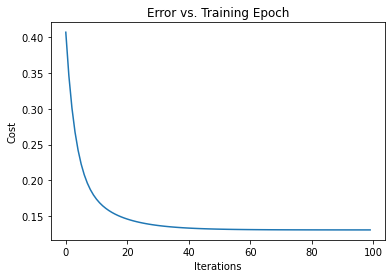

In [46]:
# draw error graph
plt.plot(np.arange(iters),cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')